In [55]:
#Generic
import pandas as pd, numpy as np, seaborn as sns, matplotlib.pyplot as plt, joblib
from scipy.stats import zscore

#Encode
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

#Skewness
from sklearn.preprocessing import PowerTransformer

#Normalize
from sklearn.preprocessing import MinMaxScaler

#Impute
from sklearn.impute import SimpleImputer

#Decomposition
from sklearn.decomposition import PCA

#Train Test Split
from sklearn.model_selection import train_test_split

#Metrics
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import accuracy_score,roc_curve,auc,classification_report,confusion_matrix

#RegressionModels
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR,LinearSVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

#ClassificationModels
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB

#Optimization
from sklearn.model_selection import GridSearchCV

In [56]:
df=pd.read_csv('Automobile_insurance_fraud.csv',na_values='?')

In [57]:
df.head()

,months_as_customer,age,policy_number,policy_bind_date,policy_state,policy_csl,policy_deductable,policy_annual_premium,umbrella_limit,insured_zip,...,police_report_available,total_claim_amount,injury_claim,property_claim,vehicle_claim,auto_make,auto_model,auto_year,fraud_reported,_c39
0,328,48,521585,17-10-2014,OH,250/500,1000,1406.91,0,466132,...,YES,71610,6510,13020,52080,Saab,92x,2004,Y,NaN
1,228,42,342868,27-06-2006,IN,250/500,2000,1197.22,5000000,468176,...,NaN,5070,780,780,3510,Mercedes,E400,2007,Y,NaN
2,134,29,687698,06-09-2000,OH,100/300,2000,1413.14,5000000,430632,...,NO,34650,7700,3850,23100,Dodge,RAM,2007,N,NaN
3,256,41,227811,25-05-1990,IL,250/500,2000,1415.74,6000000,608117,...,NO,63400,6340,6340,50720,Chevrolet,Tahoe,2014,Y,NaN
4,228,44,367455,06-06-2014,IL,500/1000,1000,1583.91,6000000,610706,...,NO,6500,1300,650,4550,Accura,RSX,2009,N,NaN


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   months_as_customer           1000 non-null   int64  
 1   age                          1000 non-null   int64  
 2   policy_number                1000 non-null   int64  
 3   policy_bind_date             1000 non-null   object 
 4   policy_state                 1000 non-null   object 
 5   policy_csl                   1000 non-null   object 
 6   policy_deductable            1000 non-null   int64  
 7   policy_annual_premium        1000 non-null   float64
 8   umbrella_limit               1000 non-null   int64  
 9   insured_zip                  1000 non-null   int64  
 10  insured_sex                  1000 non-null   object 
 11  insured_education_level      1000 non-null   object 
 12  insured_occupation           1000 non-null   object 
 13  insured_hobbies    

In [59]:
df=df.drop('_c39',axis=1)

In [60]:
df['policy_bind_date']=pd.to_datetime(df['policy_bind_date'])

In [61]:
df['policy_bind_month']=df['policy_bind_date'].dt.month

In [62]:
df['policy_bind_year']=df['policy_bind_date'].dt.year

In [63]:
df=df.drop('policy_bind_date',axis=1)

In [64]:
df['policy_state'].value_counts()

OH    352
IL    338
IN    310
Name: policy_state, dtype: int64

In [65]:
le=LabelEncoder()

In [66]:
df['policy_state']=le.fit_transform(df['policy_state'])

In [67]:
df['policy_csl'].value_counts()

250/500     351
100/300     349
500/1000    300
Name: policy_csl, dtype: int64

In [68]:
df['policy_csl']=le.fit_transform(df['policy_csl'])

In [69]:
for x in df.select_dtypes('object').columns.tolist():
    print("Unique values for {} columns is {}".format(x,df[x].nunique()))

Unique values for insured_sex columns is 2
Unique values for insured_education_level columns is 7
Unique values for insured_occupation columns is 14
Unique values for insured_hobbies columns is 20
Unique values for insured_relationship columns is 6
Unique values for incident_date columns is 60
Unique values for incident_type columns is 4
Unique values for collision_type columns is 3
Unique values for incident_severity columns is 4
Unique values for authorities_contacted columns is 5
Unique values for incident_state columns is 7
Unique values for incident_city columns is 7
Unique values for incident_location columns is 1000
Unique values for property_damage columns is 2
Unique values for police_report_available columns is 2
Unique values for auto_make columns is 14
Unique values for auto_model columns is 39
Unique values for fraud_reported columns is 2


In [70]:
df=df.drop('incident_location',axis=1)

In [71]:
for x in df.select_dtypes('object').columns.tolist():
    try:
        if df[x].nunique()==2:
            df[x]=le.fit_transform(df[x])
    except:
        print(x)

property_damage
police_report_available


In [72]:
df['property_damage'].unique()
#There are many null values in this column so we will drop this

array(['YES', nan, 'NO'], dtype=object)

In [75]:
df=df.drop('property_damage',axis=1)

In [76]:
df=df.drop('police_report_available',axis=1)

KeyError: "['police_report_available'] not found in axis"

In [77]:
df['collision_type'].value_counts()

Rear Collision     292
Side Collision     276
Front Collision    254
Name: collision_type, dtype: int64

In [78]:
si=SimpleImputer(strategy='most_frequent')

In [79]:
df['collision_type']=si.fit_transform(df['collision_type'].values.reshape(-1,1))

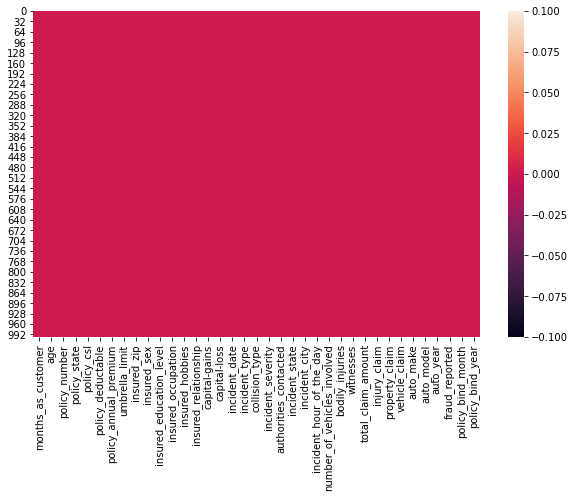

In [80]:
plt.figure(figsize=(10,6))
sns.heatmap(df.isna())
plt.show()

In [81]:
df.select_dtypes('object').columns

Index(['insured_education_level', 'insured_occupation', 'insured_hobbies',
       'insured_relationship', 'incident_date', 'incident_type',
       'collision_type', 'incident_severity', 'authorities_contacted',
       'incident_state', 'incident_city', 'auto_make', 'auto_model'],
      dtype='object')

In [82]:
for x in df.select_dtypes('object').columns.tolist():
    print("Unique values for {} columns is {}".format(x,df[x].nunique()))

Unique values for insured_education_level columns is 7
Unique values for insured_occupation columns is 14
Unique values for insured_hobbies columns is 20
Unique values for insured_relationship columns is 6
Unique values for incident_date columns is 60
Unique values for incident_type columns is 4
Unique values for collision_type columns is 3
Unique values for incident_severity columns is 4
Unique values for authorities_contacted columns is 5
Unique values for incident_state columns is 7
Unique values for incident_city columns is 7
Unique values for auto_make columns is 14
Unique values for auto_model columns is 39


In [83]:
df['insured_occupation'].unique()

array(['craft-repair', 'machine-op-inspct', 'sales', 'armed-forces',
       'tech-support', 'prof-specialty', 'other-service',
       'priv-house-serv', 'exec-managerial', 'protective-serv',
       'transport-moving', 'handlers-cleaners', 'adm-clerical',
       'farming-fishing'], dtype=object)

In [84]:
df['insured_hobbies'].unique()

array(['sleeping', 'reading', 'board-games', 'bungie-jumping',
       'base-jumping', 'golf', 'camping', 'dancing', 'skydiving',
       'movies', 'hiking', 'yachting', 'paintball', 'chess', 'kayaking',
       'polo', 'basketball', 'video-games', 'cross-fit', 'exercise'],
      dtype=object)

In [85]:
df['incident_date']=pd.to_datetime(df['incident_date'])

In [86]:
df['incident_month']=df['incident_date'].dt.month

In [87]:
df=df.drop('incident_date',axis=1)

In [88]:
for x in df.select_dtypes('object').columns.tolist():
    try:
        if df[x].nunique()==2:
            df[x]=le.fit_transform(df[x])
        else:
            df=pd.concat([df.drop(x,axis=1),pd.get_dummies(df[x])],axis=1)
    except:
        print(x)

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Columns: 155 entries, months_as_customer to X6
dtypes: float64(1), int32(4), int64(20), uint8(130)
memory usage: 306.8 KB


In [90]:
for x in df.columns:
    if abs(df.corr()['fraud_reported'][x])<0.1:
        df=df.drop(x,axis=1)

In [91]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   total_claim_amount  1000 non-null   int64
 1   property_claim      1000 non-null   int64
 2   vehicle_claim       1000 non-null   int64
 3   fraud_reported      1000 non-null   int32
 4   chess               1000 non-null   uint8
 5   cross-fit           1000 non-null   uint8
 6   Parked Car          1000 non-null   uint8
 7   Vehicle Theft       1000 non-null   uint8
 8   Major Damage        1000 non-null   uint8
 9   Minor Damage        1000 non-null   uint8
 10  Total Loss          1000 non-null   uint8
 11  Trivial Damage      1000 non-null   uint8
 12  None                1000 non-null   uint8
dtypes: int32(1), int64(3), uint8(9)
memory usage: 36.3 KB


<AxesSubplot:>

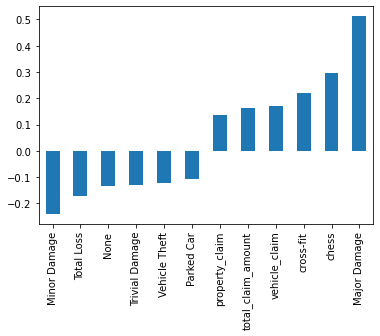

In [92]:
df.corr()['fraud_reported'].drop('fraud_reported').sort_values().plot(kind='bar')

In [93]:
df.skew()

total_claim_amount   -0.594582
property_claim        0.378169
vehicle_claim        -0.621098
fraud_reported        1.175051
chess                 4.340952
cross-fit             5.068010
Parked Car            3.003919
Vehicle Theft         2.786636
Major Damage          1.003706
Minor Damage          0.611529
Total Loss            0.981431
Trivial Damage        2.869618
None                  2.848412
dtype: float64

In [94]:
pt=PowerTransformer()

In [95]:
for x in df.columns.drop('fraud_reported'):
    if abs(df.loc[:,x].skew())>0.55:
        df.loc[:,x]=np.log1p(df.loc[:,x])

In [96]:
scale=MinMaxScaler()

In [97]:
X=df.drop('fraud_reported',axis=1)
y=df['fraud_reported']

In [98]:
X=scale.fit_transform(X)

In [99]:
def model(mod):
    maxscore=0
    maxstate=0
    for x in range(42,102):
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=x)
        model=mod
        model.fit(X_train,y_train)
        predict=model.predict(X_test)
        fpr,tpr,thresholds=roc_curve(y_test,predict)
        ac=auc(fpr,tpr)
        acc=accuracy_score(y_test,predict)
        if acc>maxscore:
            maxscore=acc
            maxstate=x
    print('Max score is {} and Max state is {}'.format(maxscore,maxstate))

In [100]:
model(LogisticRegression(max_iter=2000))

Max score is 0.8878787878787879 and Max state is 95


In [101]:
model(KNeighborsClassifier())

Max score is 0.8575757575757575 and Max state is 60


In [102]:
model(SVC())

Max score is 0.8878787878787879 and Max state is 76


In [103]:
model(DecisionTreeClassifier())

Max score is 0.8212121212121212 and Max state is 56


In [104]:
model(RandomForestClassifier())

Max score is 0.8515151515151516 and Max state is 77


In [105]:
model(GaussianNB())

Max score is 0.8848484848484849 and Max state is 76


In [106]:
model(AdaBoostClassifier())

Max score is 0.8696969696969697 and Max state is 77


In [107]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=76)

In [108]:
param={'C':[0.001,0.05,0.1,0.5,0.6,0.7,0.9,1.0]}
gscv=GridSearchCV(SVC(),param)

In [109]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.001, 0.05, 0.1, 0.5, 0.6, 0.7, 0.9, 1.0]})

In [110]:
gscv.best_params_

{'C': 0.6}

In [111]:
sv=SVC(C=0.5)

In [112]:
sv.fit(X_train,y_train)

SVC(C=0.5)

In [113]:
predict=sv.predict(X_test)

In [114]:
print(confusion_matrix(y_test,predict))
print()
print(classification_report(y_test,predict))

[[210  32]
 [  5  83]]

              precision    recall  f1-score   support

           0       0.98      0.87      0.92       242
           1       0.72      0.94      0.82        88

    accuracy                           0.89       330
   macro avg       0.85      0.91      0.87       330
weighted avg       0.91      0.89      0.89       330



In [115]:
param={'C':[0.001,0.05,0.1,0.5,0.6,0.7,0.9,1.0]}
gscv=GridSearchCV(LogisticRegression(max_iter=2000),param)

In [116]:
gscv.fit(X_train,y_train)

GridSearchCV(estimator=LogisticRegression(max_iter=2000),
             param_grid={'C': [0.001, 0.05, 0.1, 0.5, 0.6, 0.7, 0.9, 1.0]})

In [117]:
gscv.best_params_

{'C': 1.0}

In [118]:
lc=LogisticRegression(max_iter=2000,C=1.0)

In [119]:
lc.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [120]:
predict_lc=lc.predict(X_test)

In [121]:
print(confusion_matrix(y_test,predict_lc))
print()
print(classification_report(y_test,predict_lc))

[[210  32]
 [ 11  77]]

              precision    recall  f1-score   support

           0       0.95      0.87      0.91       242
           1       0.71      0.88      0.78        88

    accuracy                           0.87       330
   macro avg       0.83      0.87      0.84       330
weighted avg       0.89      0.87      0.87       330



In [122]:
#As we can see SVC is performing better we will save that model

In [123]:
joblib.dump(sv,'Auto Insurance Fraud SVC.obj')

['Auto Insurance Fraud SVC.obj']